**Data Loading:**

**MNIST** is a dataset of handwritten digits. Each image is 28x28 pixels.
The dataset is normalized by dividing the pixel values by 255 so they range between 0 and 1.
**Addition:**

We add random Gaussian noise to both the training and test images to create a noisy version of the dataset.
**Model Architecture:**

**Encoder**: Compresses the input image into a smaller, encoded representation.
Decoder: Reconstructs the original image from this encoded representation.
**Training:**

The autoencoder learns to minimize the difference between the noisy input and the original clean image.
**Testing:**

The trained model is used to denoise the noisy test images, and the original, noisy, and denoised images are displayed for comparison.
**Output:**
After training, the output will show a comparison of noisy, denoised, and original images from the test set.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2881 - val_loss: 0.1631
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1560 - val_loss: 0.1379
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1356 - val_loss: 0.1268
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1260 - val_loss: 0.1217
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.1214 - val_loss: 0.1191
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1190 - val_loss: 0.1176
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1174 - val_loss: 0.1165
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1163 - val_loss: 0.1154
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1150 - val_loss: 0.1146
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1145 - val_loss: 0.1142
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


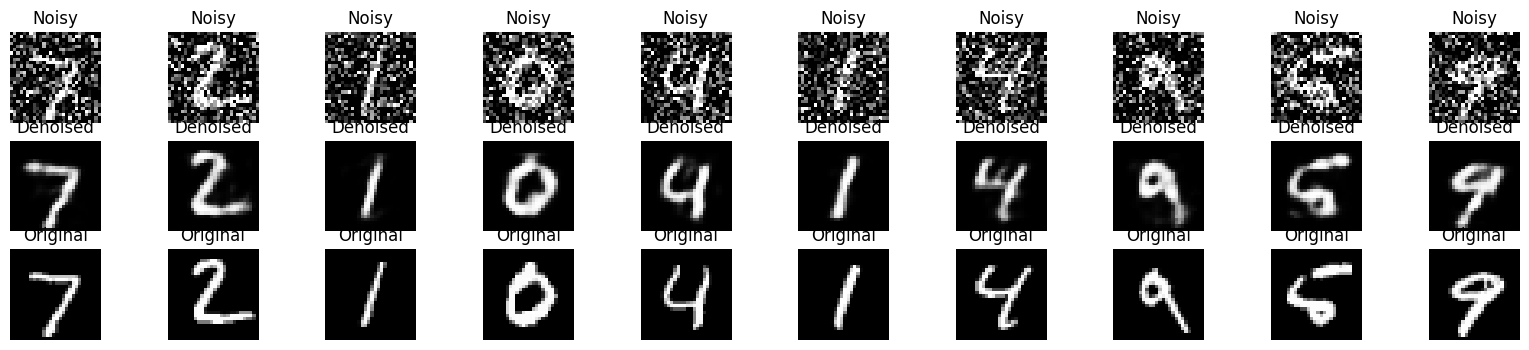

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the dataset and normalize it
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder: Compress the image
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)

# Decoder: Reconstruct the image
decoded = Dense(28*28, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(decoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Use the autoencoder to denoise images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize the original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original + noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised image
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Display original clean image
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()
